In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 400)

import numpy as np
import scipy as sp

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Image
from IPython.core.display import Image

In [5]:
# Load data
data = pd.read_csv('all_modeling_data.csv')
print '# Rows: {}, and # Columns, {}'.format(data.shape[0], data.shape[1])

# Rows: 378, and # Columns, 74


In [6]:
# Data has infinity values: replace +inf and -inf with NaN
data = data.replace([np.inf, -np.inf], np.nan)

In [26]:
cols = data.columns.tolist()
for i, j in enumerate(cols):
    print i, '-->', j

0 --> County
1 --> Jurisdiction
2 --> Longitude
3 --> Latitude
4 --> Target_ResPPD_2013
5 --> Annual_ResPPD_2013
6 --> Target_EmpPPD_2013
7 --> Annual_EmpPPD_2013
8 --> Log_Target_ResPPD_2013
9 --> Log_Annual_ResPPD_2013
10 --> Log_Target_EmpPPD_2013
11 --> Log_Annual_EmpPPD_2013
12 --> Diversity_Index
13 --> Voter_Registration_Rate
14 --> Rep_Dem_Ratio
15 --> Major_Minor_Crime_Ratio
16 --> Percent_Violent
17 --> TotCrime/1000People
18 --> Crime_Index
19 --> HH_Income_Ratio
20 --> Fam_Income_Ratio
21 --> gMean_Income_Index
22 --> PerCapitaIncome_Index
23 --> Travel_Time_Index
24 --> gMedian_Income_Index
25 --> MF_MedianEarnings_Index
26 --> Solar_ResUnits/Person
27 --> Solar_ResUnits/HH
28 --> MeanTravelTimetoWork
29 --> PercentLvgHmBefore8am
30 --> PercentNotDrivingAlonetoWork
31 --> PercentWorkingOOState
32 --> PercentWorkingOOCounty
33 --> PercentLessThan3CarsAvail
34 --> MedEarningsBachelorsDeg
35 --> PercentTotalwBachDegUnder45
36 --> PercentTotalHSGradUnder45
37 --> Percent18to24

## Feature Engineering Y Variable

In [8]:
# Difference between Target PPD - Annual PPD
data['Difference'] = data['Target_ResPPD_2013'] - data['Annual_ResPPD_2013']

In [12]:
# Just take rows where data is finite, i.e. no NaN
data = data[np.isfinite(data['Difference'])]
print 'Number of rows: {}'.format(data.shape[0])

Number of rows: 366


In [15]:
data['Label'] = pd.qcut(data['Difference'], 5, labels = np.arange(0, 5, 1))

## PCA

In [17]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()

In [19]:
temp = data.copy() # Precaution to not modify source dataframe

# X cols
x = temp.columns.tolist()[12:57] # Subset data by selecting x cols
temp_x = temp[x]

# Replace NaN's with median values
temp_x = temp_x.fillna(temp_x.median())

# Standardization: rendering data with zero mean and standard deviation 1
x_std = (temp_x - temp_x.mean(axis = 0))/temp_x.std(axis = 0)

In [20]:
transform = pca.fit_transform(x_std)

In [21]:
# Explained Variance 
pca.explained_variance_ratio_.sum()

0.99999999999999978

In [22]:
# Check the dimensions
print pca.explained_variance_ratio_.shape[0]

# Multiply Explained Variance Ratio with 100 to get %
print pca.explained_variance_ratio_*100

print "First 10 PC's explain %0.2f percent of data" % (pca.explained_variance_ratio_[:10].sum() * 100)

45
[  2.44161813e+01   9.26999489e+00   8.91091030e+00   7.36471328e+00
   5.15354477e+00   3.88260096e+00   3.70609933e+00   3.45744875e+00
   2.93502525e+00   2.71922383e+00   2.24438030e+00   2.17062548e+00
   2.03936029e+00   1.87178099e+00   1.78060748e+00   1.71407745e+00
   1.57592127e+00   1.35816240e+00   1.28448213e+00   1.24105875e+00
   1.20041561e+00   1.17486746e+00   1.02759175e+00   9.39283898e-01
   8.79644348e-01   8.53687724e-01   7.57541065e-01   6.65622746e-01
   6.33331695e-01   5.84422352e-01   5.34923301e-01   3.41007180e-01
   2.92676022e-01   2.29739846e-01   2.10419601e-01   1.38394362e-01
   1.18165625e-01   8.33632358e-02   6.84199646e-02   6.32994149e-02
   3.30059647e-02   3.04407021e-02   2.74251636e-02   1.59705075e-02
   1.41194916e-04]
First 10 PC's explain 71.82 percent of data


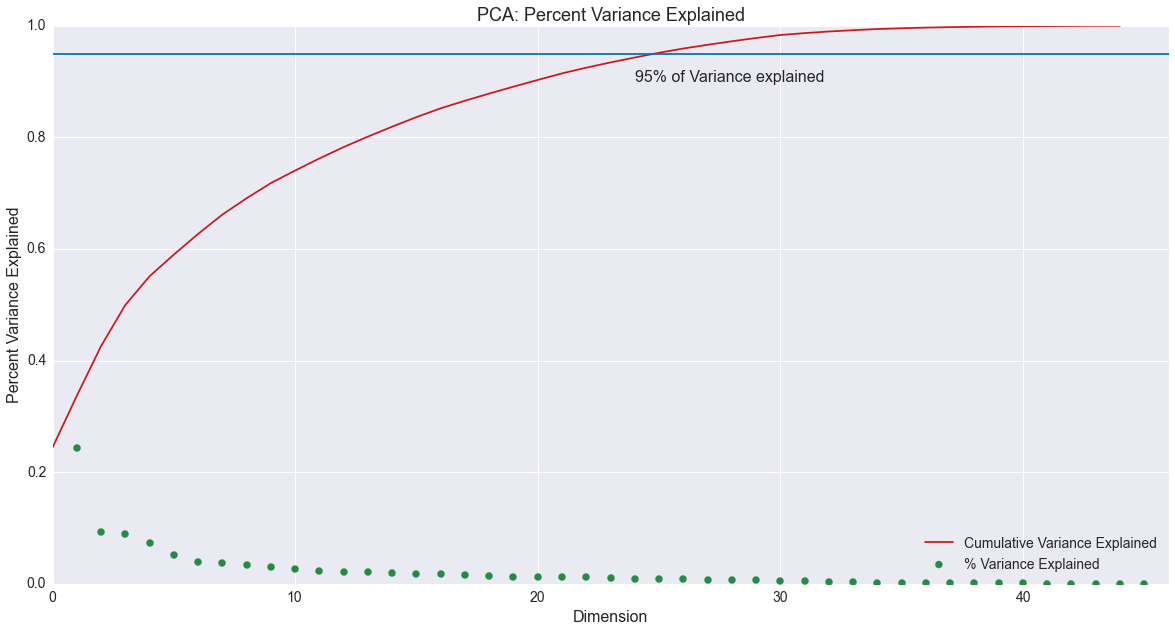

In [23]:
# Plot Variance Explained
plt.figure(figsize = (20, 10))
plt.scatter(range(1, pca.explained_variance_ratio_.shape[0]+1), pca.explained_variance_ratio_, s = 50, 
            color = '#238b45', label = '% Variance Explained')
plt.plot(np.cumsum(pca.explained_variance_ratio_), color = '#cb181d', label = 'Cumulative Variance Explained')
plt.xlabel("Dimension", fontsize = 16)
plt.ylabel("Percent Variance Explained", fontsize = 16)
plt.xlim(0, pca.explained_variance_ratio_.shape[0]+1)
plt.ylim(0,1)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(prop={'size': 14}, loc = 4)
plt.title('PCA: Percent Variance Explained', fontsize = 18)
# Plotting n = 75
plt.axhline(y = 0.95, color = '#0570b0')
plt.text(24, 0.9, '95% of Variance explained', fontsize = 16)
plt.show()

## SVD

In [24]:
# X
X = x_std
print X.shape

# Perform SVD
U, D, V = np.linalg.svd(X) # U, D, V = scipy.lianalg.svd(X, full_matrices = False)
print U.shape
print D.shape
print V.shape

var_exp = D**2/sum(D**2)
print 'The first component explains %0.2f%% of the variance' % (var_exp[0] * 100)
print 'The second component explains %0.2f%% of the variance' % (var_exp[1] * 100)

(366, 45)
(366, 366)
(45,)
(45, 45)
The first component explains 24.42% of the variance
The second component explains 9.27% of the variance


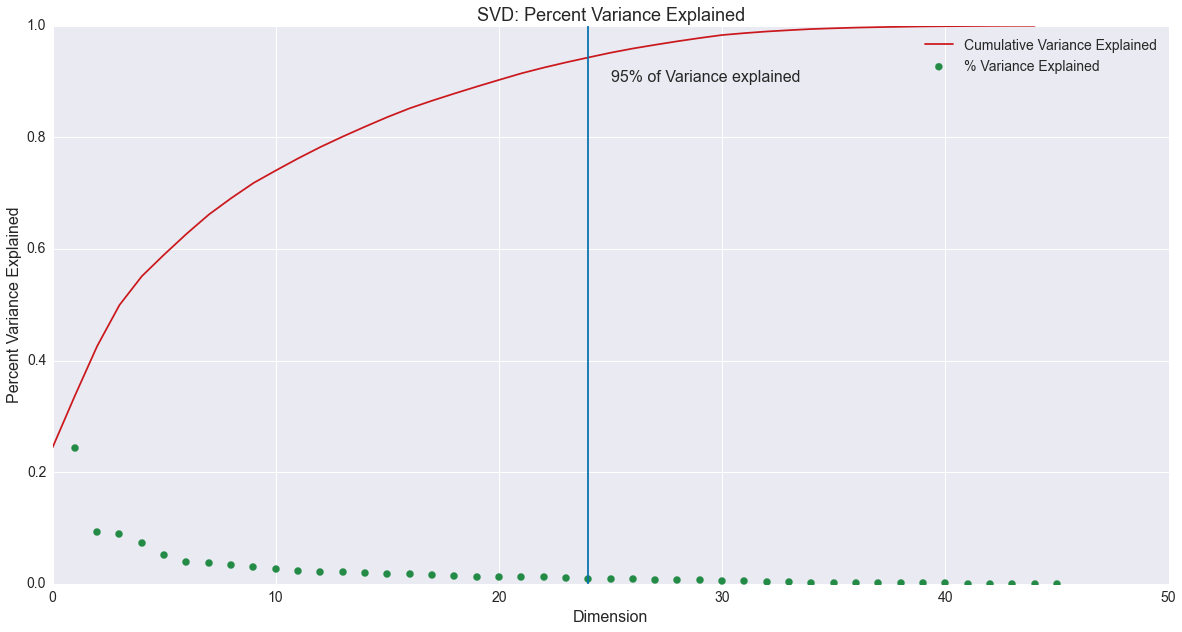

In [25]:
# Plot Variance Explained
plt.figure(figsize = (20, 10))
plt.scatter(range(1, len(D)+1), D**2/np.sum(D**2), s = 50, color = '#238b45', label = '% Variance Explained')
plt.plot(np.cumsum(D**2/np.sum(D**2)), color = '#cb181d', label = 'Cumulative Variance Explained')
plt.xlabel("Dimension", fontsize = 16)
plt.ylabel("Percent Variance Explained", fontsize = 16)
plt.xlim(0, 50)
plt.ylim(0, 1.0)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(prop={'size': 14})
plt.title('SVD: Percent Variance Explained', fontsize = 18)
# Plotting n = 75
plt.axvline(x = 24, color = '#0570b0')
plt.text(24 + 1, 0.9, '95% of Variance explained', fontsize = 16)
plt.show()

## Decision Tree

In [27]:
from sklearn import tree

# Prepare data
temp = data
x = temp.columns.tolist()[12:57] # Subset data by selecting x cols
temp_x = temp[x]
# Replace NaN's with median values
temp_x = temp_x.fillna(temp_x.median())
x_std = (temp_x - temp_x.mean(axis = 0))/temp_x.std(axis = 0)

y_labels = temp['Label']

In [32]:
temp.groupby(['Label'])['Jurisdiction'].count()

Label
0        74
1        73
2        74
3        73
4        72
Name: Jurisdiction, dtype: int64

In [33]:
# Prepare data
temp = data
x = temp.columns.tolist()[12:57] # Subset data by selecting x cols
temp_x = temp[x]
# Replace NaN's with median values
temp_x = temp_x.fillna(temp_x.median())
x_std = (temp_x - temp_x.mean(axis = 0))/temp_x.std(axis = 0)

In [34]:
# Create an instance of DT classifier
clf = tree.DecisionTreeClassifier()

# Fit Decision Trees
clf = clf.fit(temp_x, y_labels)

In [35]:
# Visualize Tree: Need to install package from http://www.graphviz.org/
from sklearn.externals.six import StringIO
with open('tree.dot', 'w') as output_file:
    output_file = tree.export_graphviz(clf, out_file = output_file)

# dot -Tps filename.dot -o outfile.ps # where 'ps' is file format
!dot -Tpng tree.dot > tree.png

In [36]:
for i, j in zip(temp_x.columns, clf.feature_importances_):
    if j > 0:
        print 'Feature: {} and Feature Importance: {}'.format(i,j)

Feature: Diversity_Index and Feature Importance: 0.0388420311639
Feature: Rep_Dem_Ratio and Feature Importance: 0.0601563355115
Feature: Major_Minor_Crime_Ratio and Feature Importance: 0.0136477595801
Feature: Percent_Violent and Feature Importance: 0.042285285433
Feature: TotCrime/1000People and Feature Importance: 0.0627035310193
Feature: Crime_Index and Feature Importance: 0.0678109394304
Feature: HH_Income_Ratio and Feature Importance: 0.00341538978369
Feature: Fam_Income_Ratio and Feature Importance: 0.0107470714769
Feature: gMean_Income_Index and Feature Importance: 0.0115990185511
Feature: PerCapitaIncome_Index and Feature Importance: 0.0472977534655
Feature: Travel_Time_Index and Feature Importance: 0.0153472501148
Feature: gMedian_Income_Index and Feature Importance: 0.0550164534739
Feature: MF_MedianEarnings_Index and Feature Importance: 0.00341538978369
Feature: Solar_ResUnits/Person and Feature Importance: 0.00512308467554
Feature: Solar_ResUnits/HH and Feature Importance: 

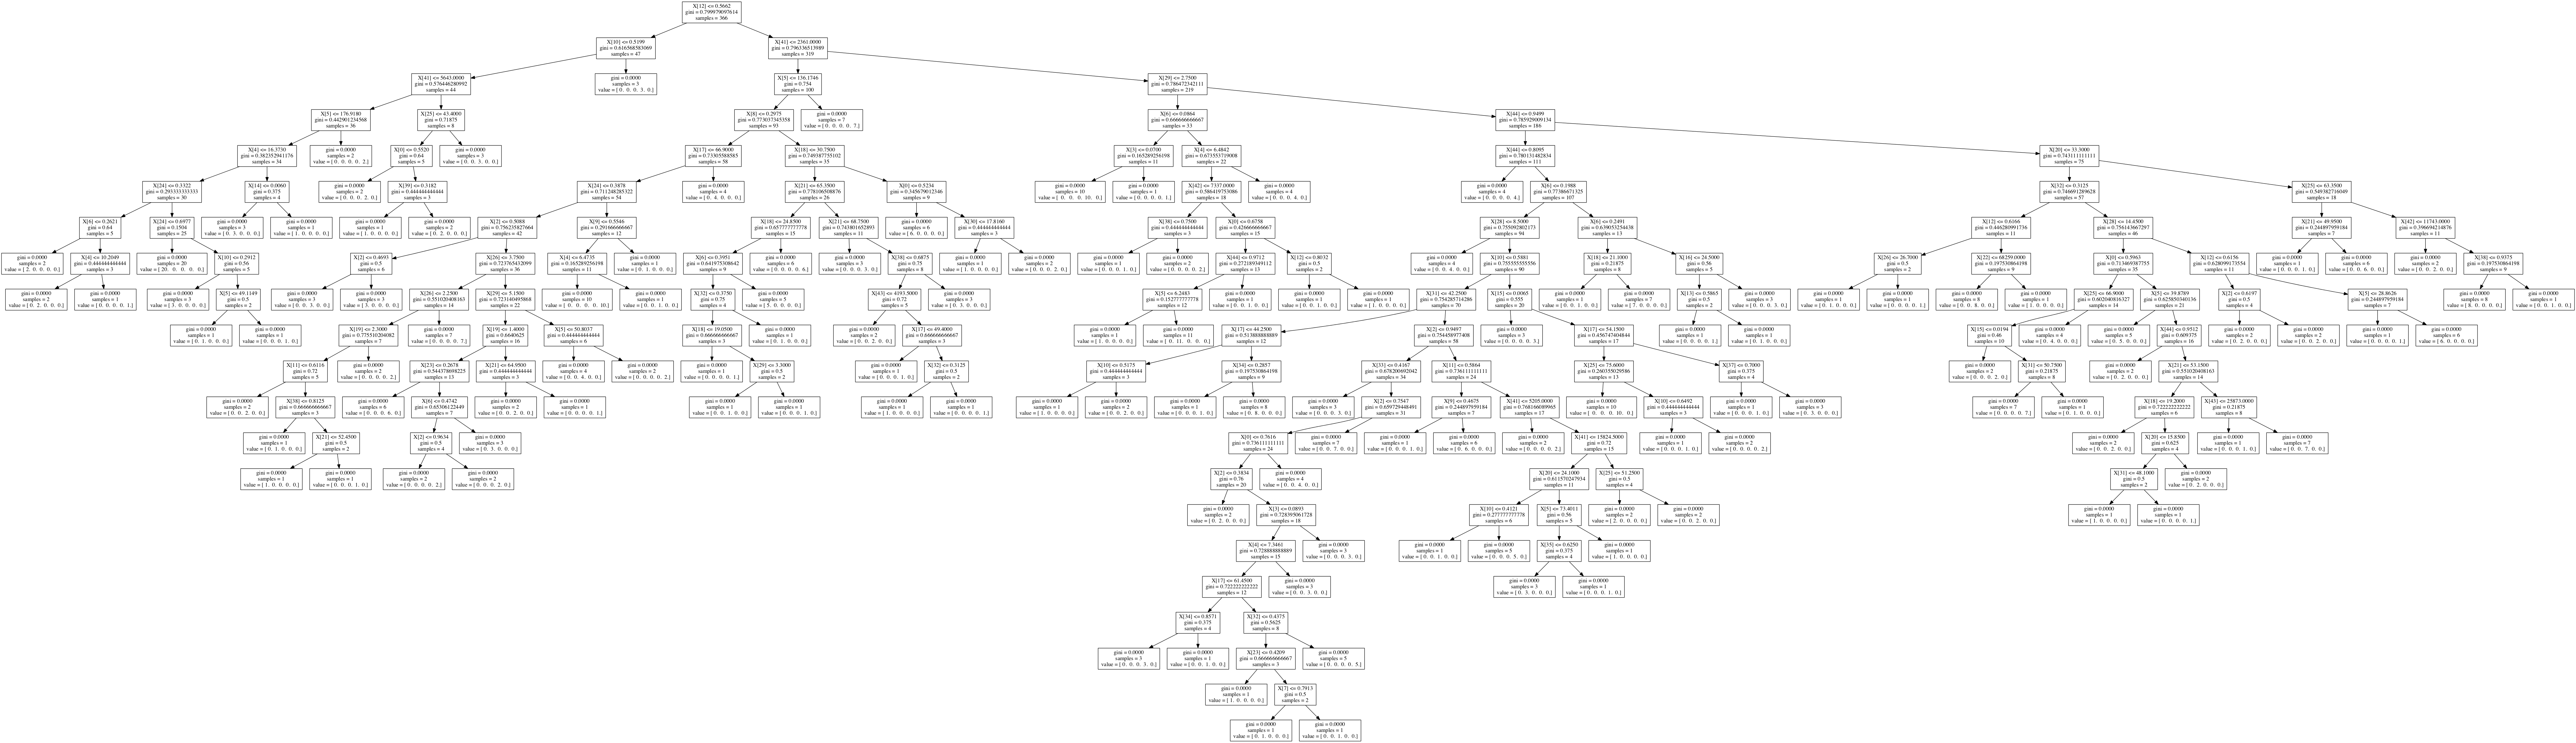

In [37]:
Image(filename = 'tree.png')

## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

scores = []
for n in range(1, 51):
    clf = RandomForestClassifier(n_estimators = n)
    score_list = cross_val_score(clf, temp_x, y_labels, cv = 10)
    scores.append(score_list)

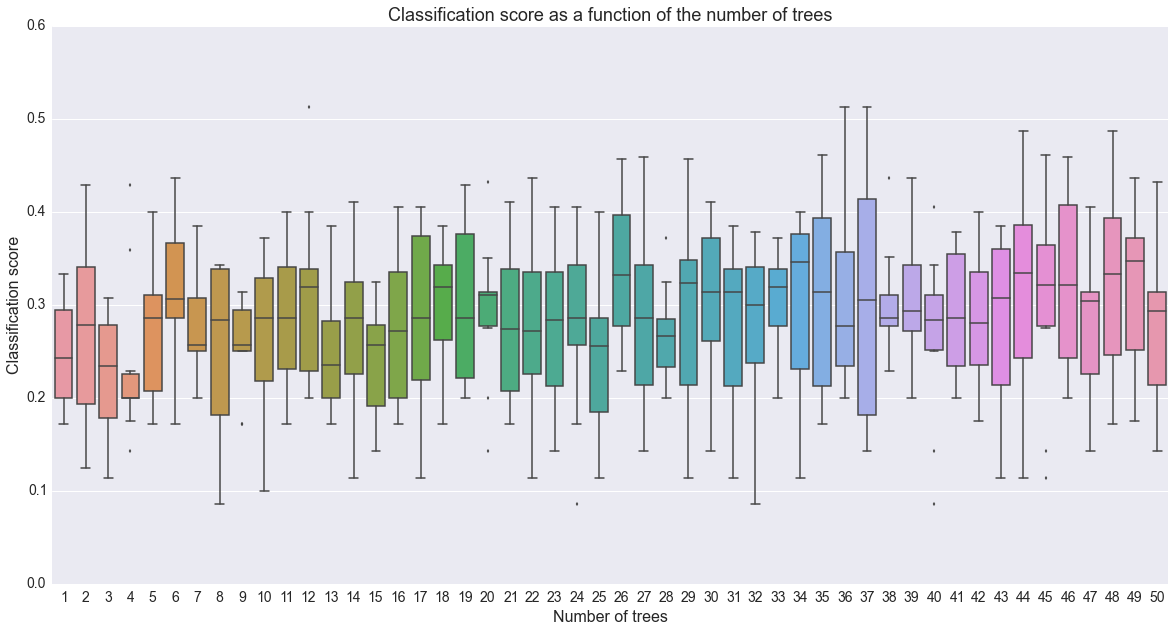

In [39]:
plt.figure(figsize = (20, 10))
sns.boxplot(scores)
plt.xlabel('Number of trees', fontsize = 16)
plt.ylabel('Classification score', fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.title('Classification score as a function of the number of trees', fontsize = 18)
plt.show()

In [40]:
scores = []
for n in range(1, 51):
    clf = RandomForestClassifier(n_estimators = n)
    score_list = cross_val_score(clf, temp_x, y_labels, cv = 10, scoring = 'f1')
    scores.append(score_list)

/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/metrics.py:1771: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


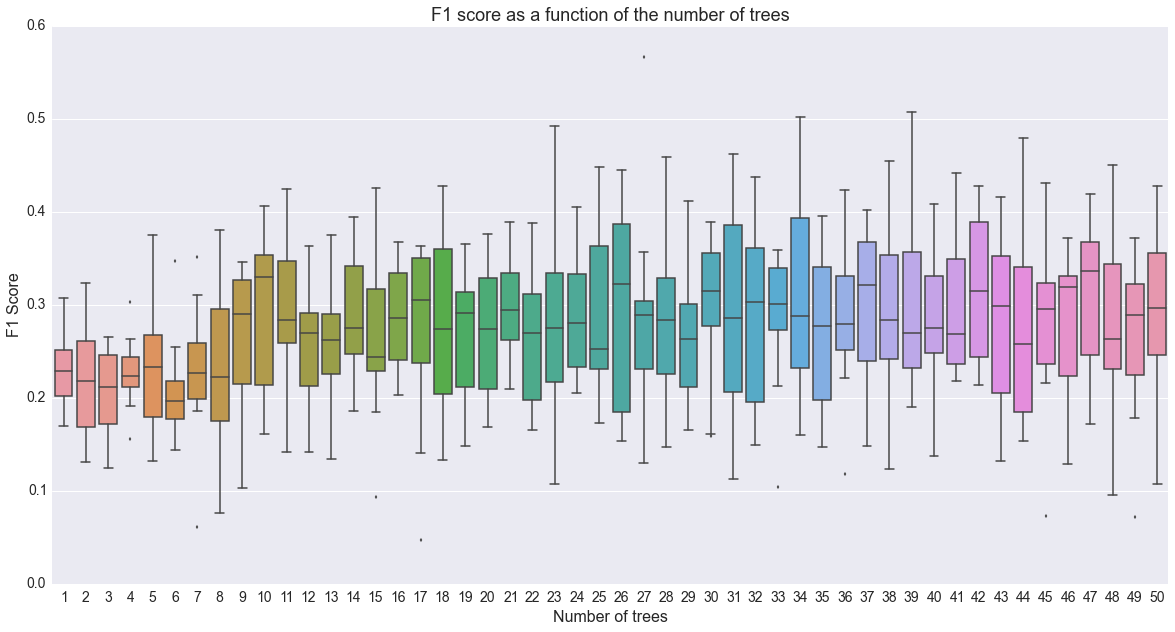

In [41]:
plt.figure(figsize = (20, 10))
sns.boxplot(scores)
plt.xlabel('Number of trees', fontsize = 16)
plt.ylabel('F1 Score', fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.title('F1 score as a function of the number of trees', fontsize = 18)
plt.show()

### Feature Importance

In [42]:
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(temp_x, y_labels)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

In [43]:
# Create feature importance and feature name list
feature_importance_list = clf.feature_importances_
feature_name_list = temp_x.columns

# Zip both lists
feature_importance, feature_name = zip(*sorted(zip(feature_importance_list, feature_name_list)))

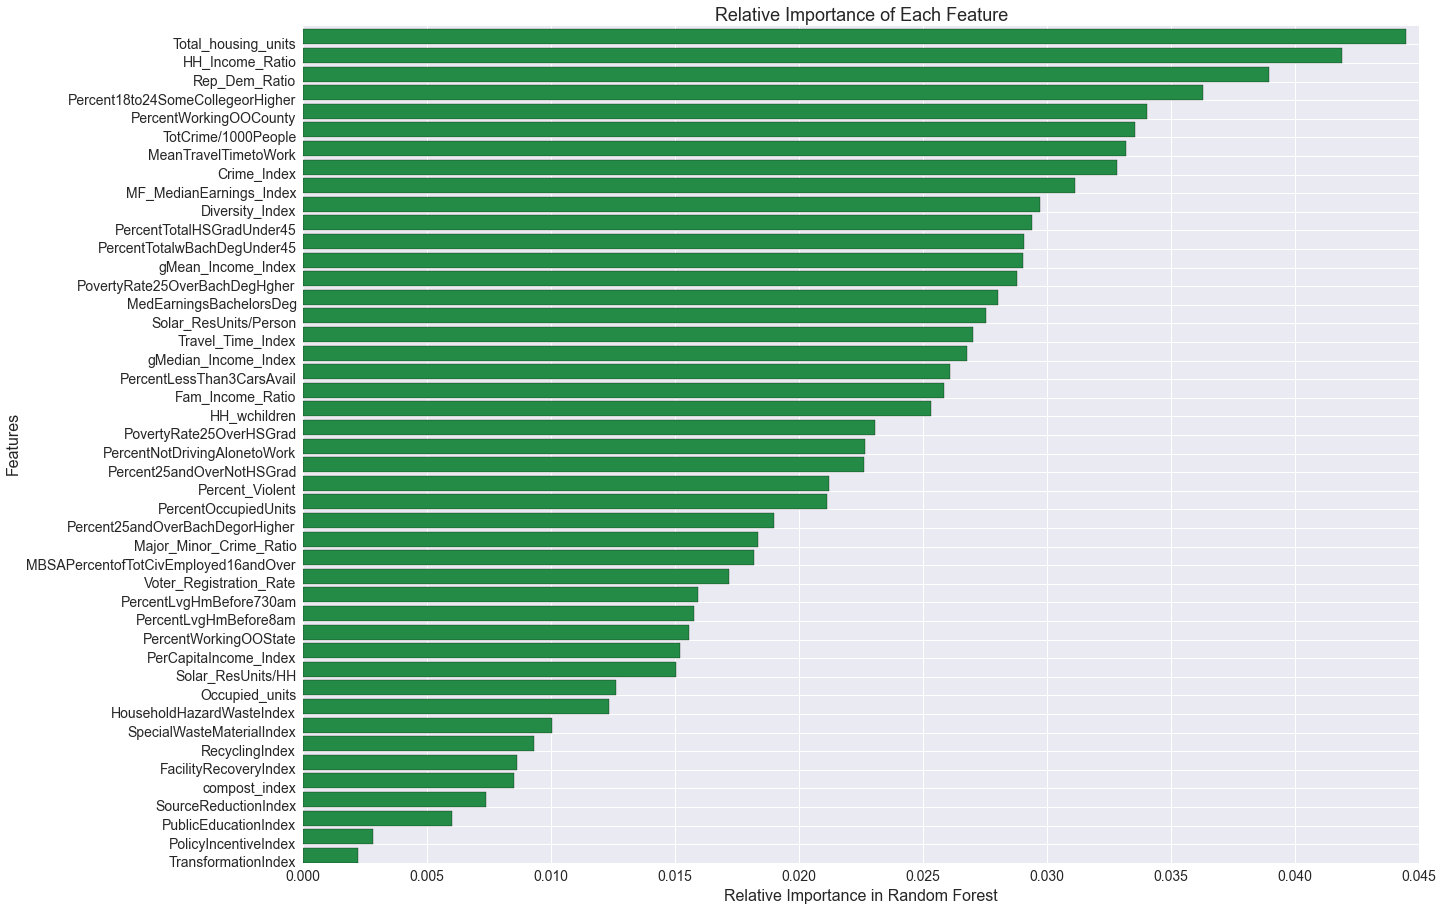

In [44]:
plt.figure(figsize = (20, 15))
plt.barh(range(len(feature_name)), feature_importance, color = '#238b45')#, align = 'center')
plt.yticks(range(len(feature_name)), feature_name)
plt.xlabel('Relative Importance in Random Forest', fontsize = 16)
plt.ylabel('Features', fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.title('Relative Importance of Each Feature', fontsize = 18)
plt.show()

## PCA Biplot

In [45]:
# Create feature importance and feature name list
feature_importance_list = clf.feature_importances_
feature_name_list = temp_x.columns

# Zip both lists and sort in descending order
#featureImportance = sorted(zip(feature_importance_list, feature_name_list), reverse = True)
featureImportance = zip(feature_importance_list, feature_name_list)

# Get feature names when feature importance > 0.05
feature_names = []
for i in featureImportance:
    if i[0] >= 0.035:
    #if i[0] >= 0.03 and i[0] < 0.035:
        feature_names.append(i[1])
        
feature_names = feature_names

In [64]:
temp = data

## Select important features
pca_data = temp[feature_names]

pca_data['Label'] = temp['Label']
## Replace NaN's with median values
pca_data = pca_data.fillna(pca_data.median())

## normalized x
# Standardization: rendering data with zero mean and standard deviation 1
pca_std = (pca_data - pca_data.mean(axis = 0))/pca_data.std(axis = 0)

# Set Location as index
pca_std.index = temp['Jurisdiction']
#pca_std.index = pca_std.index.format()


In [65]:
pca_data.head()

,Rep_Dem_Ratio,HH_Income_Ratio,Percent18to24SomeCollegeorHigher,Total_housing_units,Label
0,0.418214,2.249584,32.7,9086,3
1,0.840605,0.097842,58.4,7585,1
2,0.257205,0.319145,69.1,32351,3
3,0.098452,0.301002,66.9,7889,3
4,0.396516,0.633876,68.8,30915,1


In [76]:
# Ref-1: https://sukhbinder.wordpress.com/2015/08/05/biplot-with-python/
# Ref-2: https://github.com/teddyroland/python-biplot/blob/master/biplot.py

def biplot(data, factor, status = None):
    f = factor
    # Create an instance of PCA
    pca = PCA()
    # Fit data
    pca.fit(data)
    # Get the directions of maximum variance in the data
    x_vector = pca.components_[0]
    y_vector = pca.components_[1]
    # Get the principal components or apply dimensionality reduction
    x = pca.transform(data)[:, 0]
    y = pca.transform(data)[:, 1]
    # Visualize projection
    plt.figure(figsize = (20, 10))
    plt.xlabel("PC-1", fontsize = 16)
    plt.ylabel("PC-2", fontsize = 16)  
    plt.xlim(x.min()*f, x.max()*f)
    plt.ylim(y.min()*f, y.max()*f)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
    plt.title('PCA Biplot: ' + str(status), fontsize = 18)
    # Plot vectors (i.e. data columns)
    for i in range(len(x_vector)):
        plt.arrow(0, 0, x_vector[i]*max(x), y_vector[i]*max(y), color = '#cb181d', head_width = 0.05, head_length = 0.1)
        plt.text(x_vector[i]*max(x), y_vector[i]*max(y), list(data.columns.values)[i], color = '#cb181d', fontsize = 12)
    # Plot principan component values (i.e. rows)
    for i in range(len(x)):
        plt.scatter(x[i]*f, y[i]*f, color = '#238b45', alpha = 0.5, s = 30)
        plt.text(x[i]*f, y[i]*f, list(data.index)[i], color = '#2171b5', fontsize = 10)
        
# Note: Biplot arrows that point in the direction of increasing values for that variable.    

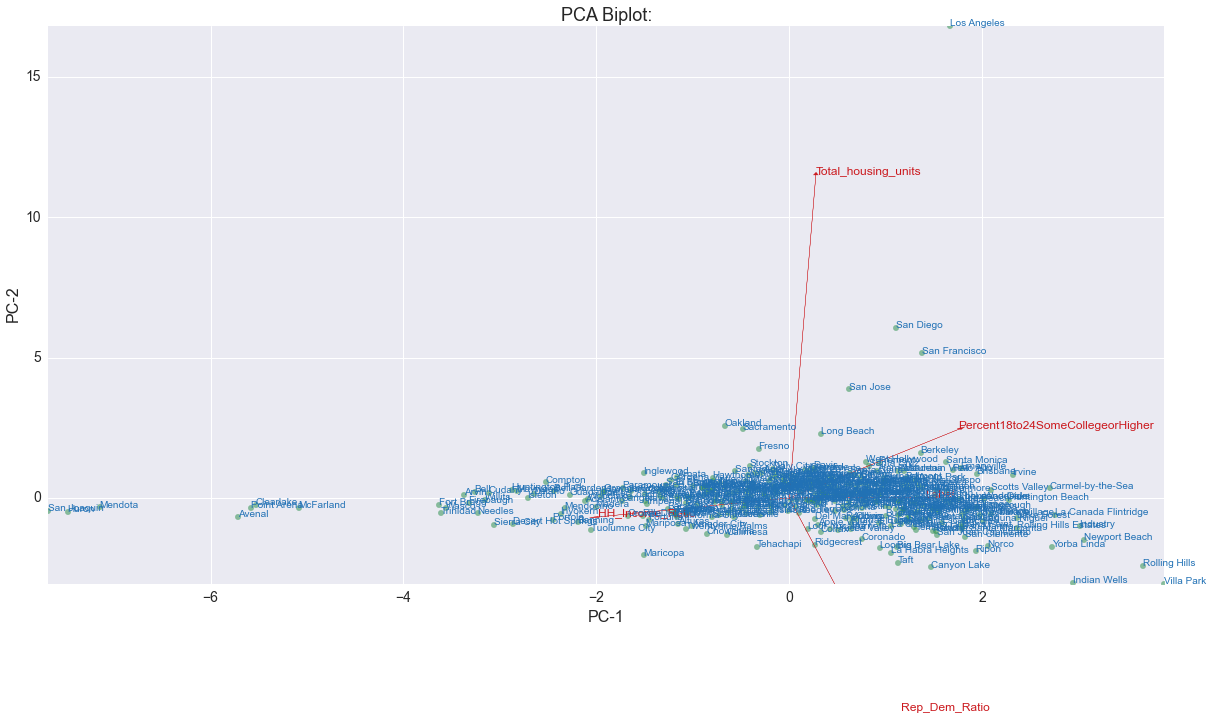

In [67]:
biplot(pca_std, 1.2)

In [77]:
temp = data

## Select important features
pca_data = temp[feature_names]

## Replace NaN's with median values
pca_data = pca_data.fillna(pca_data.median())

## normalized x
# Standardization: rendering data with zero mean and standard deviation 1
pca_std = (pca_data - pca_data.mean(axis = 0))/pca_data.std(axis = 0)

# Set Location as index
pca_std.index = temp['Jurisdiction']
pca_std.index = pca_std.index.format()

# Y labels
pca_std['Label'] = temp['Label'].values

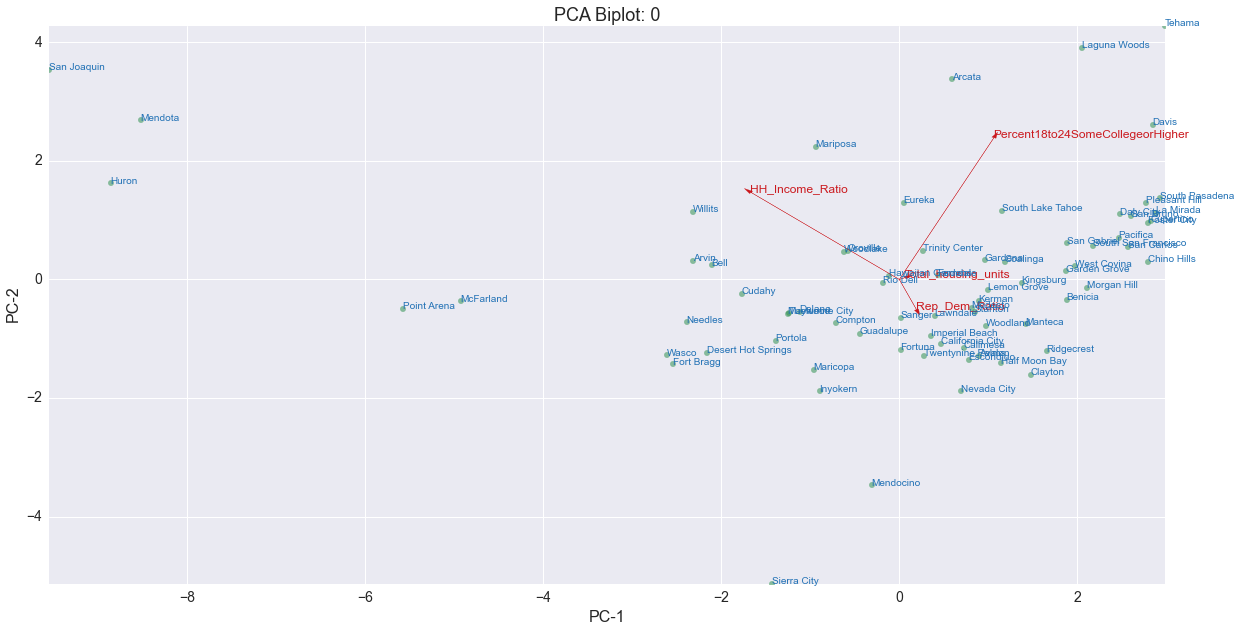

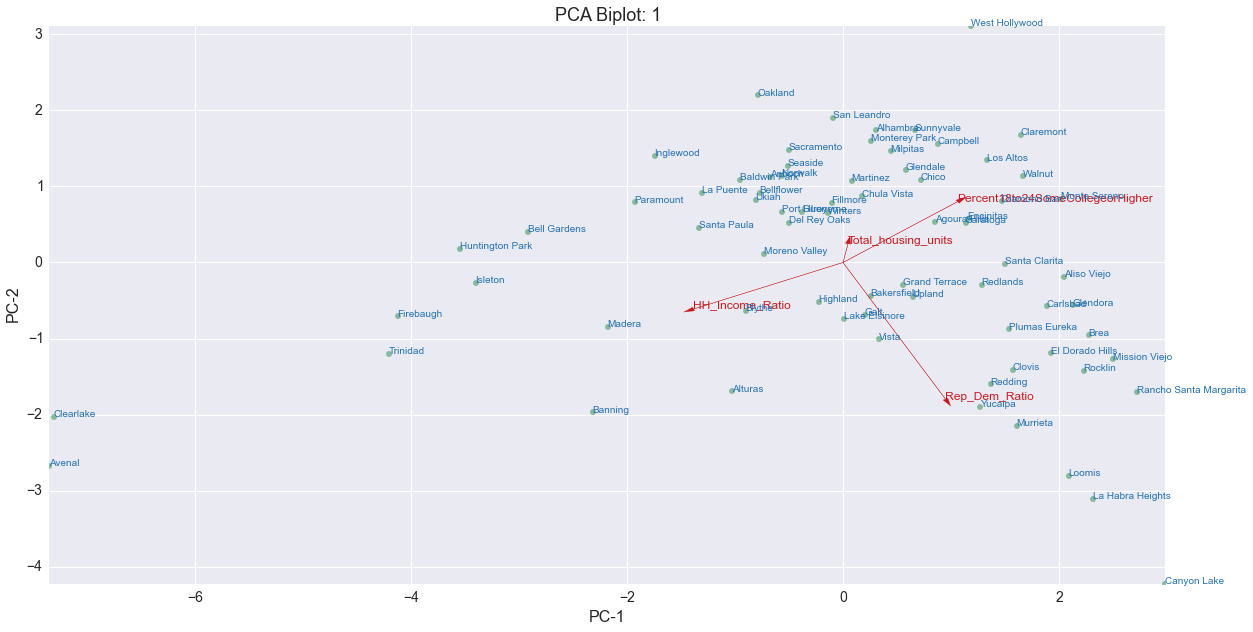

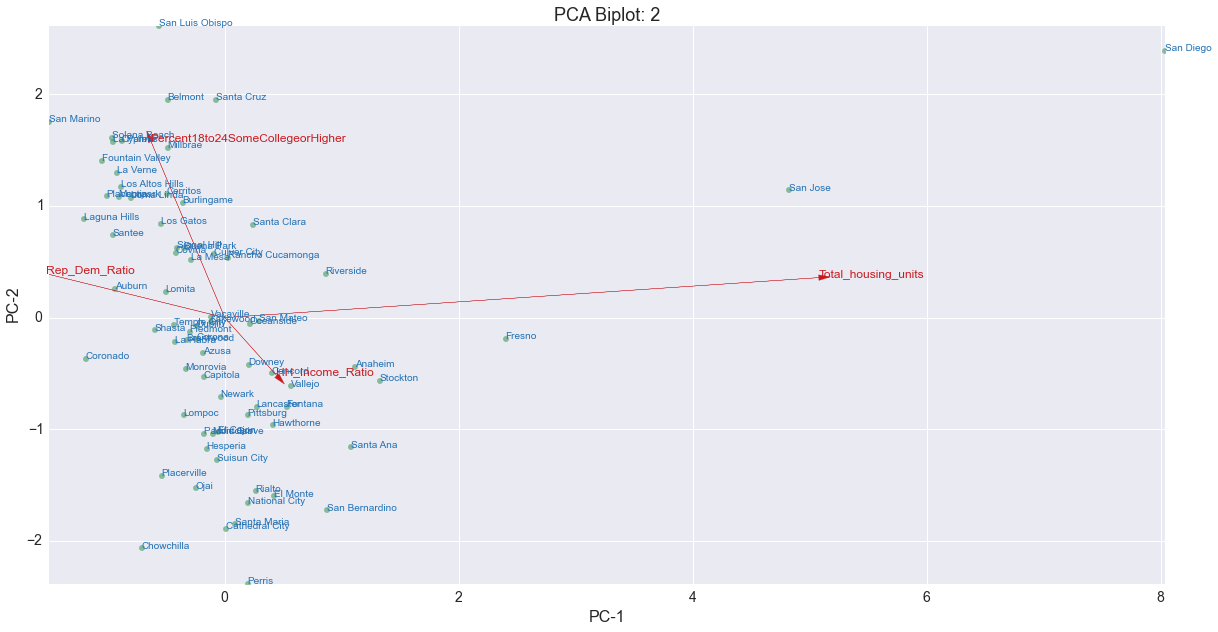

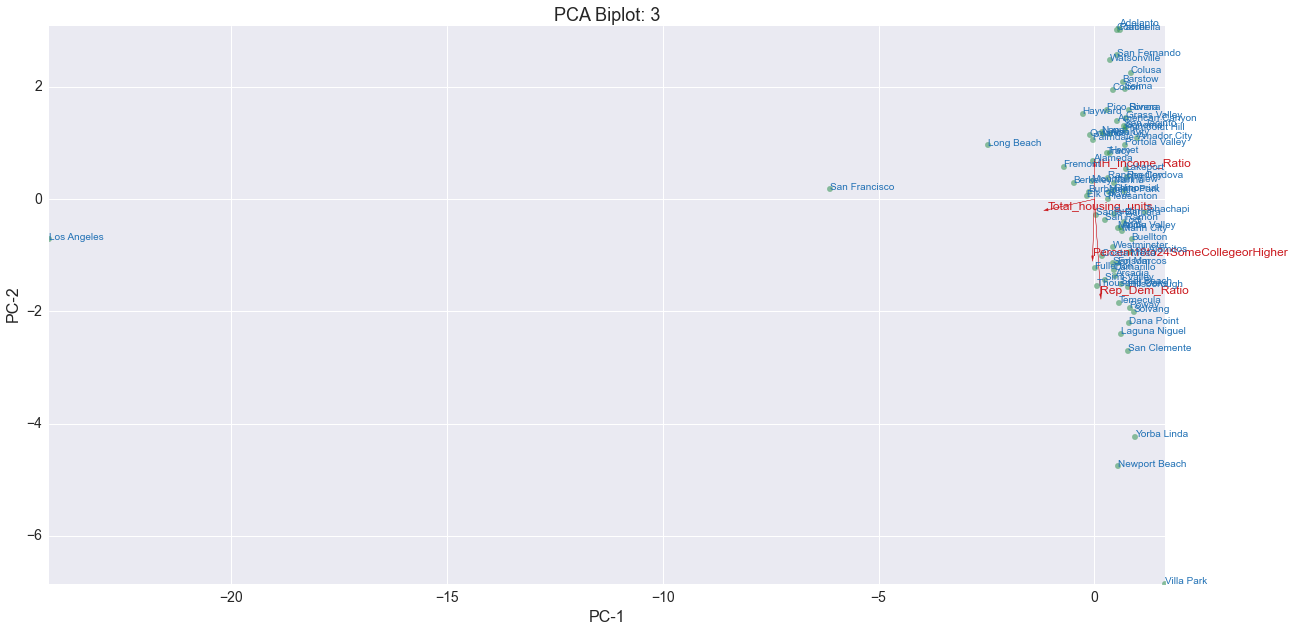

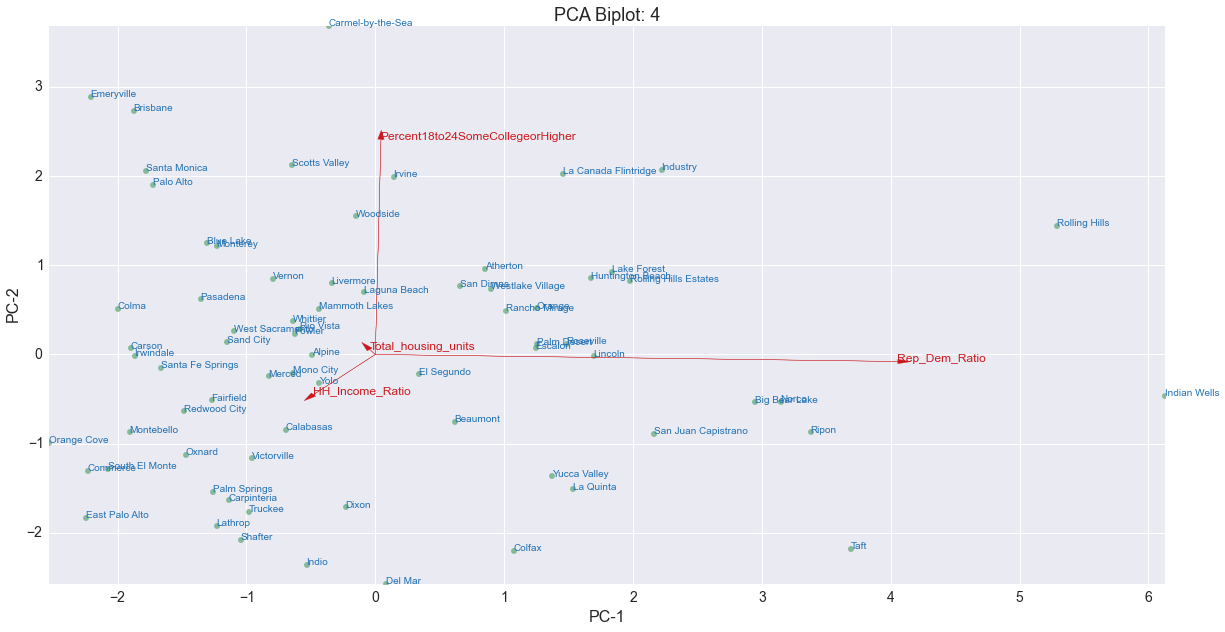

In [78]:
for i in set(temp['Label'].values):
    mask = pca_std['Label'] == i
    mask_df = pca_std[mask]
    biplot(mask_df[mask_df.columns.tolist()[:-1]], 1.5, status = i)